# Práctica 1: Aprendizaje automático

__Fecha de entrega: XX de YYY de 2022 (CAMBIAR PARA DAR 3 SEMANAS A CADA GRUPO)__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

In [ ]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `Mall_Customers.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `Customer ID` es el identificador del cliente
  - `Gender` es el género del cliente (Male|Female)
  - `Annual Income` son los ingresos anuales en cientos de dólares del cliente
  - `Age` es la edad del cliente
  - `Spending Score` es una puntuación asignada por el mall basada en el comportamiento del cliente y a sus gastos

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IA2/p2/Mall_Customers.csv', index_col = 0)
df

In [1]:
import pandas as pd

df = pd.read_csv('./Mall_Customers.csv', index_col=0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [18]:
ageData = df['Age'].describe().transpose()

ageData



count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [14]:

incomeData = df['Annual Income (k$)'].describe().transpose()

print(incomeData)




count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


In [15]:
spendingData = df['Spending Score (1-100)'].describe().transpose()

print(spendingData)


count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


array([[<AxesSubplot: xlabel='Age', ylabel='Age'>,
        <AxesSubplot: xlabel='Annual Income (k$)', ylabel='Age'>,
        <AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<AxesSubplot: xlabel='Age', ylabel='Annual Income (k$)'>,
        <AxesSubplot: xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<AxesSubplot: xlabel='Age', ylabel='Spending Score (1-100)'>,
        <AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Spending Score (1-100)'>]],
      dtype=object)

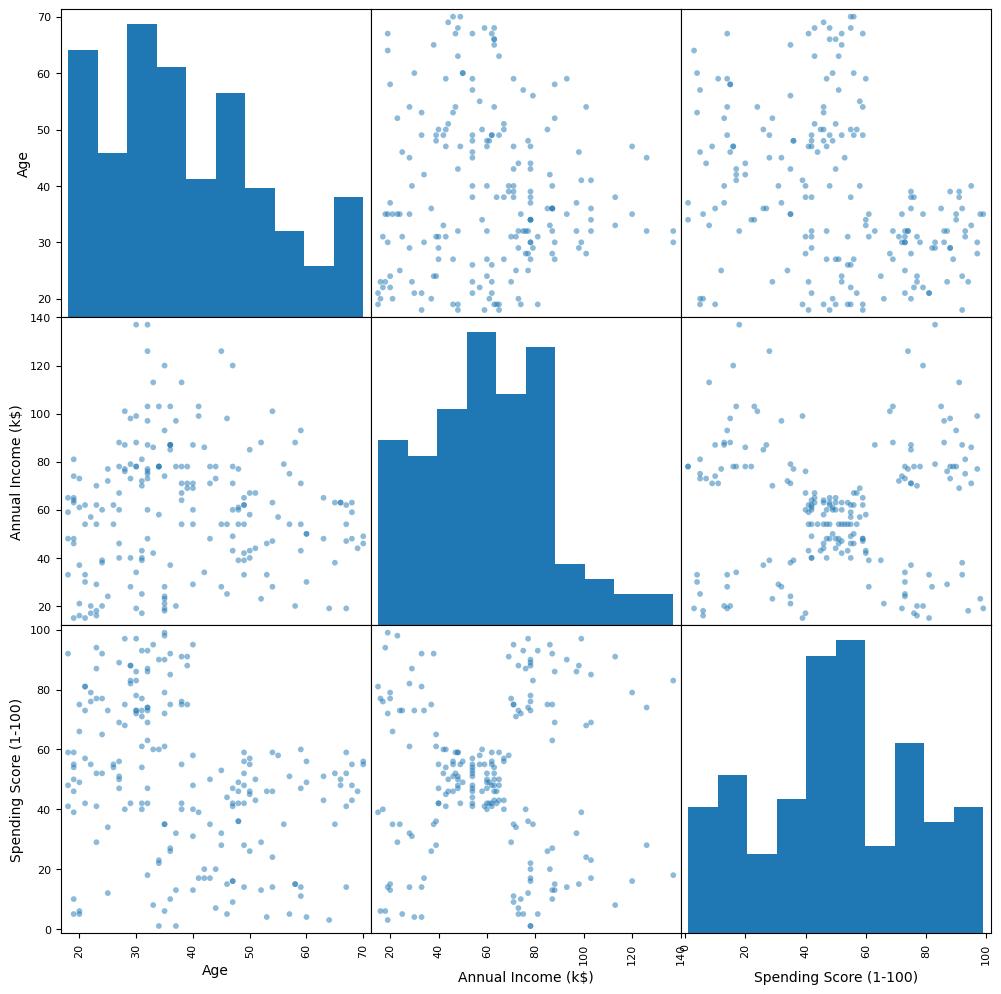

In [36]:
from pandas.plotting import scatter_matrix
%matplotlib inline


scatter_matrix(df, s= 70, figsize=(12, 12), diagonal='hist')


In [37]:
df.corr()

/tmp/ipykernel_3508/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000



### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables `Annual income`, y `spending score`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de clientes similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [38]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df[['Annual Income (minmax)', 'Spending Score (minmax)']] = min_max_scaler.fit_transform(
    df[['Annual Income (k$)', 'Spending Score (1-100)']])

df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (minmax),Spending Score (minmax)
CustomerID,,,,,,
1,Male,19,15,39,0.000000,0.387755
2,Male,21,15,81,0.000000,0.816327
3,Female,20,16,6,0.008197,0.051020
4,Female,23,16,77,0.008197,0.775510
5,Female,31,17,40,0.016393,0.397959


In [40]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

# Fase de ajuste
standard_scaler.fit(df[['Annual Income (k$)']])

# Fase de transformación
df[['Annual Income (standard)']] = standard_scaler.transform(
    df[['Annual Income (k$)']])

df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (minmax),Spending Score (minmax),Annual Income (standard),Annual Income (standard)
CustomerID,,,,,,,,
1,Male,19,15,39,0.000000,0.387755,-1.738999,-1.738999
2,Male,21,15,81,0.000000,0.816327,-1.738999,-1.738999
3,Female,20,16,6,0.008197,0.051020,-1.700830,-1.700830
4,Female,23,16,77,0.008197,0.775510,-1.700830,-1.700830
5,Female,31,17,40,0.016393,0.397959,-1.662660,-1.662660


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo y el índice davies_boulding en función del número de clusters.

In [41]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [57]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """

    colors = ['r', 'g', 'b', 'c', 'y', 'k', 'm', ]
    fig = plt.figure(figsize=(8, 8))

    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear
    # las distintas clases
    plt.scatter(X["Annual Income (minmax)"], X["Spending Score (minmax)"], c=labels, cmap=ListedColormap(colors))

    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers["Annual Income (minmax)", 0], centers["Spending Score (minmax)", 1], marker="x",
                    color='k', s=150, linewidths=5, zorder=10)

    plt.show()


/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

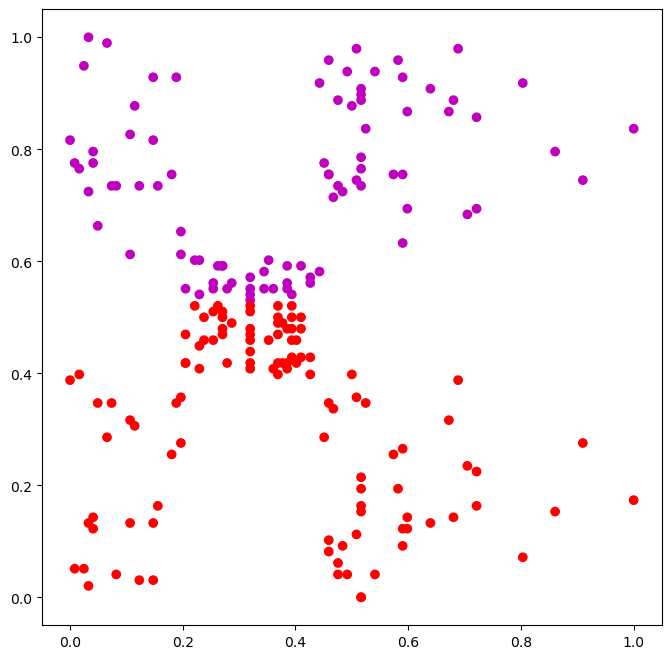

In [58]:
NUMCLUSTERS = 5


X = df.loc[:, ["Annual Income (minmax)", "Spending Score (minmax)"]]

davies_boulding = np.zeros(NUMCLUSTERS - 2)

for k in range(2, NUMCLUSTERS):
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(X)
    plot_clusters(X, km.labels_, km.cluster_centers_)

    davies_boulding[k-2] = davies_bouldin_score(X, km.labels_)


## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de clientes quedan en cada cluster? 

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.

